In [9]:
import pandas as pd
import datetime as dt
import numpy as np

import pylab as pl
import seaborn as sns

%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [10]:
IN_PATH = '/Users/anokhin/Desktop/hmc.txt'
OUT_PATH = '/Users/anokhin/Desktop/hmc.la.jss'

In [11]:
ts_parser = lambda ts: dt.datetime.strptime(ts, "%Y%m%d")
df1 = pd.read_csv(
    IN_PATH, sep="\t", 
    header=None, names=['cuid', 'emails', 'okids', 'vkids', 'other_dt', 'retro_dt', 'age', 'sex'],
    converters={'retro_dt': ts_parser, 'other_dt': ts_parser},
    dtype={"okids": str, "vkids": str}
)
print df1["retro_dt"].min()
df1.head()

2015-11-01 00:00:00


,cuid,emails,okids,vkids,other_dt,retro_dt,age,sex
0,12814383,NaN,476098459883,89428298,2015-11-01,2015-12-31,0.267833,0
1,12815295,N23tR0U3XbEin5JzKuGQKA==,NaN,NaN,2015-11-01,2015-12-31,0.610265,0
2,13303284,NaN,465082598247,NaN,2015-09-02,2015-11-01,0.606655,0
3,13303286,b+mdLYlLe5OSRsObJpC49IFZ5jAGYw5E,473059158253,90066070,2015-09-02,2015-11-01,0.214993,1
4,13303291,Wzlsi11u0tR/jXICnxPoAKMQBF2FyZE1,"573322029087,571518239702",NaN,2015-09-02,2015-11-01,0.570502,0


(97164, 8)


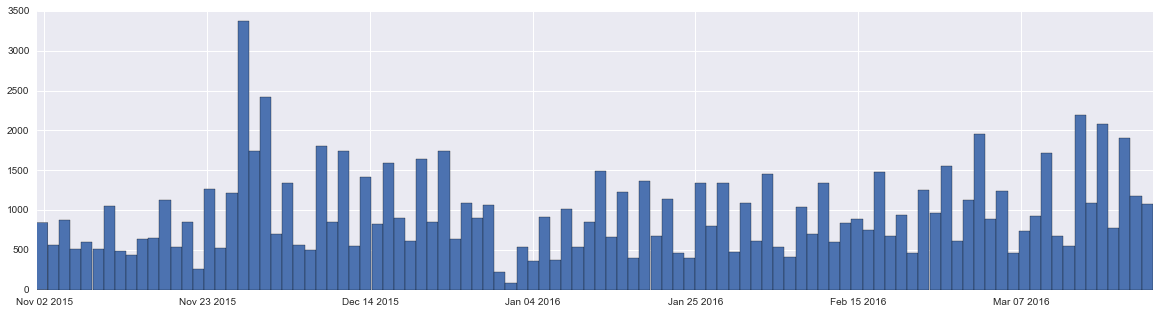

In [13]:
print df1.shape
pl.figure(figsize=(20, 5))
df1['retro_dt'].hist(bins=100)
pl.show()

In [16]:
USER_PATTERN = '{"vid":"%s","okid":%s,"email":%s,"vkid":%s,"category":{"int":%d},"start":{"long":%d},"end":{"long":%d}}'
STRING_PATTERN = '{"string":"%s"}'
MONTH_SECONDS = 31 * 24 * 60 * 60

In [17]:
with open(OUT_PATH, "w") as out_file:
    for i, row in df1.iterrows():
        end_ts = int(row["retro_dt"].strftime("%s"))
        start_ts = end_ts - MONTH_SECONDS        
        
        emails = row["emails"].split(",") if pd.notnull(row["emails"]) else [""]
        okids = row["okids"].split(",") if pd.notnull(row["okids"]) else [""]
        vkids = row["vkids"].split(",") if pd.notnull(row["vkids"]) else [""]
        
        for email in emails:
            for okid in okids:
                for vkid in vkids:
                    em = STRING_PATTERN % email if email else "null"
                    ok = STRING_PATTERN % okid if okid else "null"
                    vk = STRING_PATTERN % vkid if vkid else "null"
                    print >> out_file, USER_PATTERN % ("", ok, em, vk, 1, start_ts, end_ts)

In [18]:
# USER_PATTERN = '{"vid":"%s","okid":%s,"email":%s,"vkid":null,"category":{"int":%d},"start":{"long":%d},"end":{"long":%d}}'
# with open("active_emails.jss", "w") as out_file:
#     with open("active_emails") as ae:
#         for line in ae:
#             print >> out_file, USER_PATTERN % ("", "null", STRING_PATTERN % line.strip(), 2, 1435708800, 1446336000)

In [19]:
%%bash
head /Users/anokhin/Desktop/hmc.txt
head /Users/anokhin/Desktop/hmc.la.jss

12814383		476098459883	89428298	20151101	20151231	0.267833	0.00
12815295	N23tR0U3XbEin5JzKuGQKA==			20151101	20151231	0.610265	0.00
13303284		465082598247		20150902	20151101	0.606655	0.00
13303286	b+mdLYlLe5OSRsObJpC49IFZ5jAGYw5E	473059158253	90066070	20150902	20151101	0.214993	1.00
13303291	Wzlsi11u0tR/jXICnxPoAKMQBF2FyZE1	573322029087,571518239702		20150902	20151101	0.570502	0.00
13303315	ow3dve31Q0qYe+57H3VoTCIR8Jkh5HsV			20150902	20151101	0.226190	1.00
13303343	itED97i7/BAoFWHdH59TqaMQBF2FyZE1	281309792837	26969391	20150902	20151101	0.246487	0.00
13303351	KndRC40WvISEHMkYfWzCSg==,5jXu+rcpwWpBQAItoSjXYOTVEQ6hCvVL		10370432	20150902	20151101	0.628196	1.00
13303372		454284163657	108844038	20150902	20151101	0.258294	1.00
13303377		480188308011,473842891018		20150902	20151101	0.523810	1.00
{"vid":"","okid":{"string":"476098459883"},"email":null,"vkid":{"string":"89428298"},"category":{"int":1},"start":{"long":1448830800},"end":{"long":1451509200}}
{"vid":"","okid":null,"email":{"string"